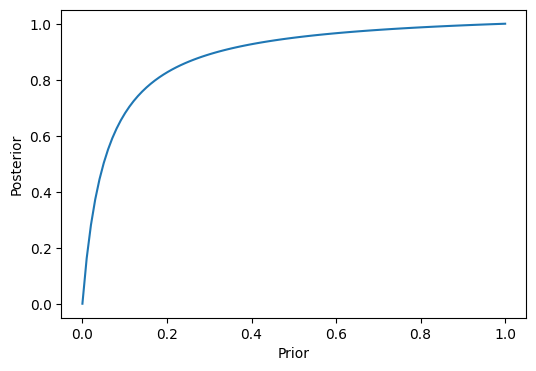

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

SENSITIVITY = 0.95
SPECIFICITY = 0.95

def posterior(prior, sensitivity, specificity):
    return (sensitivity * prior) / (sensitivity * prior + (1 - specificity) * (1 - prior))

priors = np.linspace(0, 1, 100)
posteriors = posterior(priors, SENSITIVITY, SPECIFICITY)

plt.figure(figsize=(6, 4))
plt.plot(priors, posteriors)
plt.xlim(0, 1) 
plt.ylim(0, 1)
plt.xlabel('Prior')
plt.ylabel('Posterior')
plt.show()



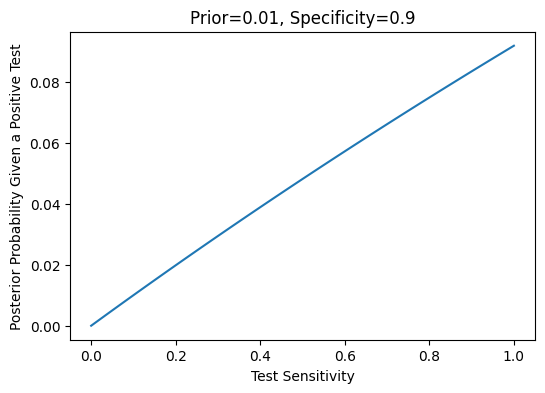

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

prior = 0.01
specificity = 0.90

def posterior_prob(prior, sensitivity, specificity):
    return (sensitivity * prior) / ((sensitivity * prior) + ((1 - specificity) * (1 - prior)))

sensitivities = np.linspace(0, 1, 100)
posteriors = [posterior_prob(prior, sens, specificity) for sens in sensitivities]

# Plot
plt.figure(figsize=(6, 4))
plt.plot(sensitivities, posteriors)
plt.title(f'Prior={prior}, Specificity={specificity}') 
plt.xlabel('Test Sensitivity')
plt.ylabel('Posterior Probability Given a Positive Test')
plt.show()

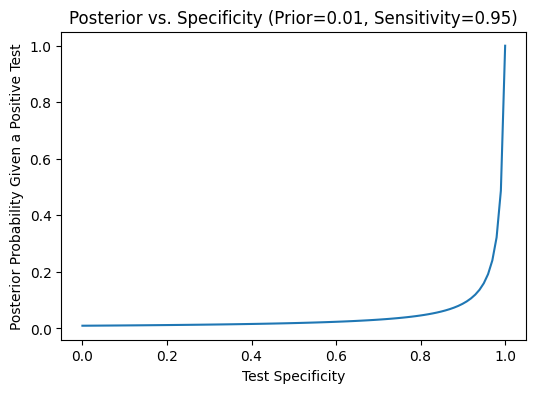

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

prior = 0.01
sensitivity = 0.95

def posterior_prob(prior, sensitivity, specificity):
    return (sensitivity * prior) / ((sensitivity * prior) + ((1 - specificity) * (1 - prior)))

# Vary specificity from 0 to 1
specificities = np.linspace(0, 1, 100)
posteriors = [posterior_prob(prior, sensitivity, sp) for sp in specificities]

# Plot
plt.figure(figsize=(6, 4))
plt.plot(specificities, posteriors) 
plt.title(f'Posterior vs. Specificity (Prior={prior}, Sensitivity={sensitivity})')
plt.xlabel('Test Specificity')
plt.ylabel('Posterior Probability Given a Positive Test')
plt.show()

In [ ]:
'''
As the disease becomes more common (higher prior), the posterior increases because a positive test is more believable.

Increasing sensitivity (correctly detecting disease) lowers false negatives, raising the posterior.

Increasing specificity (correctly identifying healthy individuals) lowers false positives, also raising the posterior.

'''

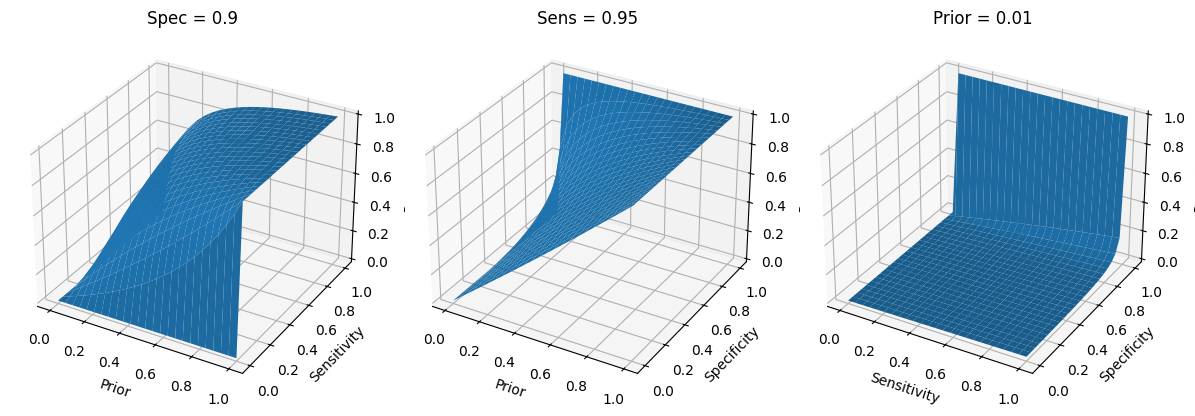

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def posterior_prob(prior, sens, spec, eps=1e-10):
    denom = (sens * prior) + ((1 - spec) * (1 - prior))
    return (sens * prior) / (denom + eps)

# Define ranges
points = 25
priors = np.linspace(0, 1, points)
sens = np.linspace(0, 1, points)
spec = np.linspace(0, 1, points)

fig = plt.figure(figsize=(12, 4))

# Posterior vs. (prior, sensitivity), fixed specificity
SPEC_FIXED = 0.90
P, S = np.meshgrid(priors, sens)
Z1 = posterior_prob(P, S, SPEC_FIXED)
ax1 = fig.add_subplot(131, projection='3d')
surf1 = ax1.plot_surface(P, S, Z1)
ax1.set_title(f'Spec = {SPEC_FIXED}')
ax1.set_xlabel('Prior')
ax1.set_ylabel('Sensitivity')
ax1.set_zlabel('Posterior')

# Posterior vs. (prior, specificity), fixed sensitivity
SENS_FIXED = 0.95
P2, Sp = np.meshgrid(priors, spec)
Z2 = posterior_prob(P2, SENS_FIXED, Sp)
ax2 = fig.add_subplot(132, projection='3d')
surf2 = ax2.plot_surface(P2, Sp, Z2)
ax2.set_title(f'Sens = {SENS_FIXED}')
ax2.set_xlabel('Prior')
ax2.set_ylabel('Specificity')
ax2.set_zlabel('Posterior')


# Posterior vs. (sensitivity, specificity), fixed prior
PRIOR_FIXED = 0.01
S3, Sp3 = np.meshgrid(sens, spec)
Z3 = posterior_prob(PRIOR_FIXED, S3, Sp3)
ax3 = fig.add_subplot(133, projection='3d')
surf3 = ax3.plot_surface(S3, Sp3, Z3)
ax3.set_title(f'Prior = {PRIOR_FIXED}')
ax3.set_xlabel('Sensitivity')
ax3.set_ylabel('Specificity')
ax3.set_zlabel('Posterior')

plt.tight_layout()
plt.show()